# Churn Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing Datasets

df = pd.read_csv('Customer Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


##### Replacing Blanks with 0

In [ ]:
df['TotalCharges'] = df['TotalCharges'].replace('', '0')
df['TotalCharges'] = df['TotalCharges'].astype('float')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


##### Checking if there is any null values

In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


##### Checking if there are any duplicate values

In [ ]:
df.duplicated().sum()

np.int64(0)

##### Checking if there is any duplicated values in 'CustomerID'

In [ ]:
df['customerID'].duplicated().sum()

np.int64(0)

##### Converting 0 and 1 to 'no' & 'yes' in SeniorCitizen Column

In [ ]:
def convert(value):
  if value == 1:
    return 'yes'
  else:
    return 'no'
  
df['SeniorCitizen'] = df['SeniorCitizen'].apply(convert)

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


##### Checking Total Numbers of Churned vs Non-Churned Customer

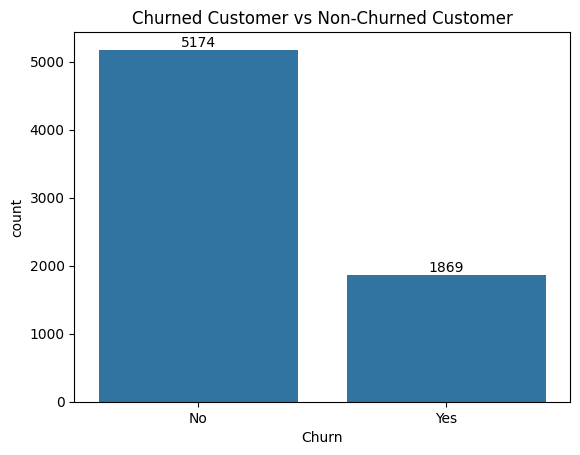

In [ ]:
ax = sns.countplot(x='Churn', data=df)

ax.bar_label(ax.containers[0])
plt.title('Churned Customer vs Non-Churned Customer')
plt.show()

In [ ]:
gb = df.groupby('Churn').agg({'Churn':'count'})
gb

,Churn
Churn,
No,5174
Yes,1869


##### Churned vs Non-Churned Customers in Percentage

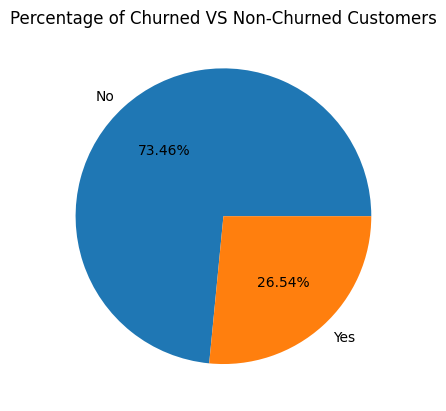

In [ ]:
gb = df.groupby('Churn').agg({'Churn':'count'})
plt.pie(gb['Churn'], labels=gb.index, autopct="%1.2f%%")
plt.title("Percentage of Churned VS Non-Churned Customers")
plt.show()

##### Churned Ration Based on Gender

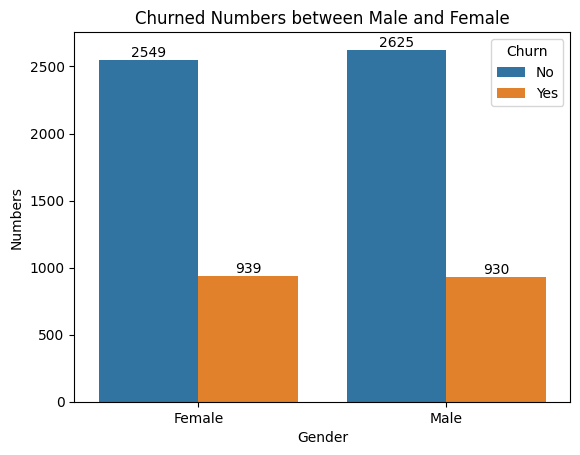

In [ ]:
ax = sns.countplot(x='gender', data=df, hue='Churn')

for container in ax.containers:
  ax.bar_label(container)

plt.title('Churned Numbers between Male and Female')
plt.xlabel("Gender")
plt.ylabel('Numbers')
plt.show()

##### Churned Numbers Based on Senior Citizen

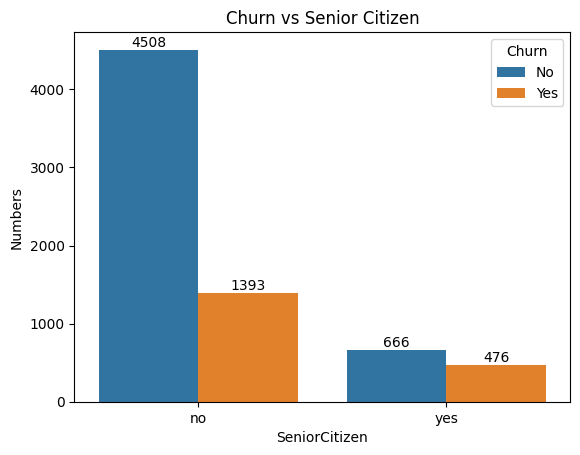

In [ ]:
ax = sns.countplot(x='SeniorCitizen', data=df, hue='Churn')

for container in ax.containers:
  ax.bar_label(container)

plt.title('Churn vs Senior Citizen')
plt.ylabel('Numbers')
plt.show()

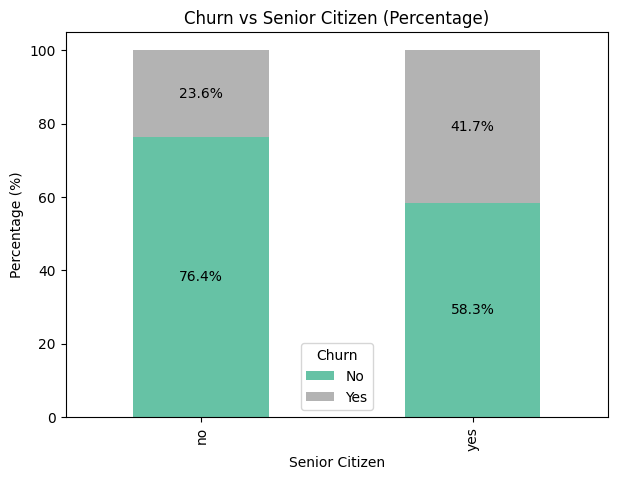

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a cross-tab to count Churn vs SeniorCitizen
ct = pd.crosstab(df['SeniorCitizen'], df['Churn'])

# Convert counts to percentages
ct_pct = ct.div(ct.sum(axis=1), axis=0) * 100

# Plot stacked bar chart
ax = ct_pct.plot(kind='bar', stacked=True, figsize=(7, 5), colormap='Set2')

# Add percentage labels on each bar segment
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center')

plt.title('Churn vs Senior Citizen (Percentage)')
plt.xlabel('Senior Citizen')
plt.ylabel('Percentage (%)')
plt.legend(title='Churn')
plt.show()


##### Count of Senior Citizen

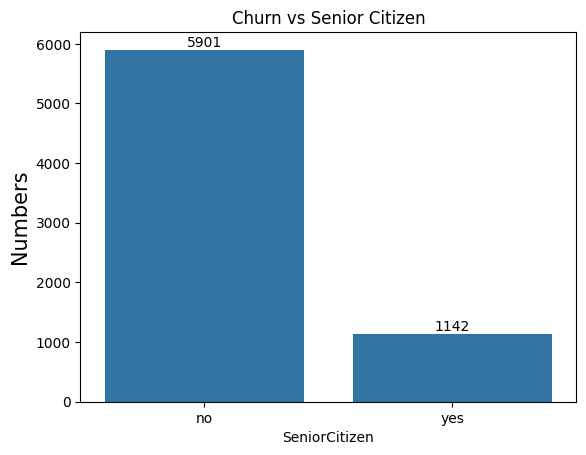

In [ ]:
ax = sns.countplot(x='SeniorCitizen', data=df)

for container in ax.containers:
  ax.bar_label(container)

plt.title('Churn vs Senior Citizen')
plt.ylabel('Numbers', fontsize="15")
plt.show()

##### Churn Vs Tenure

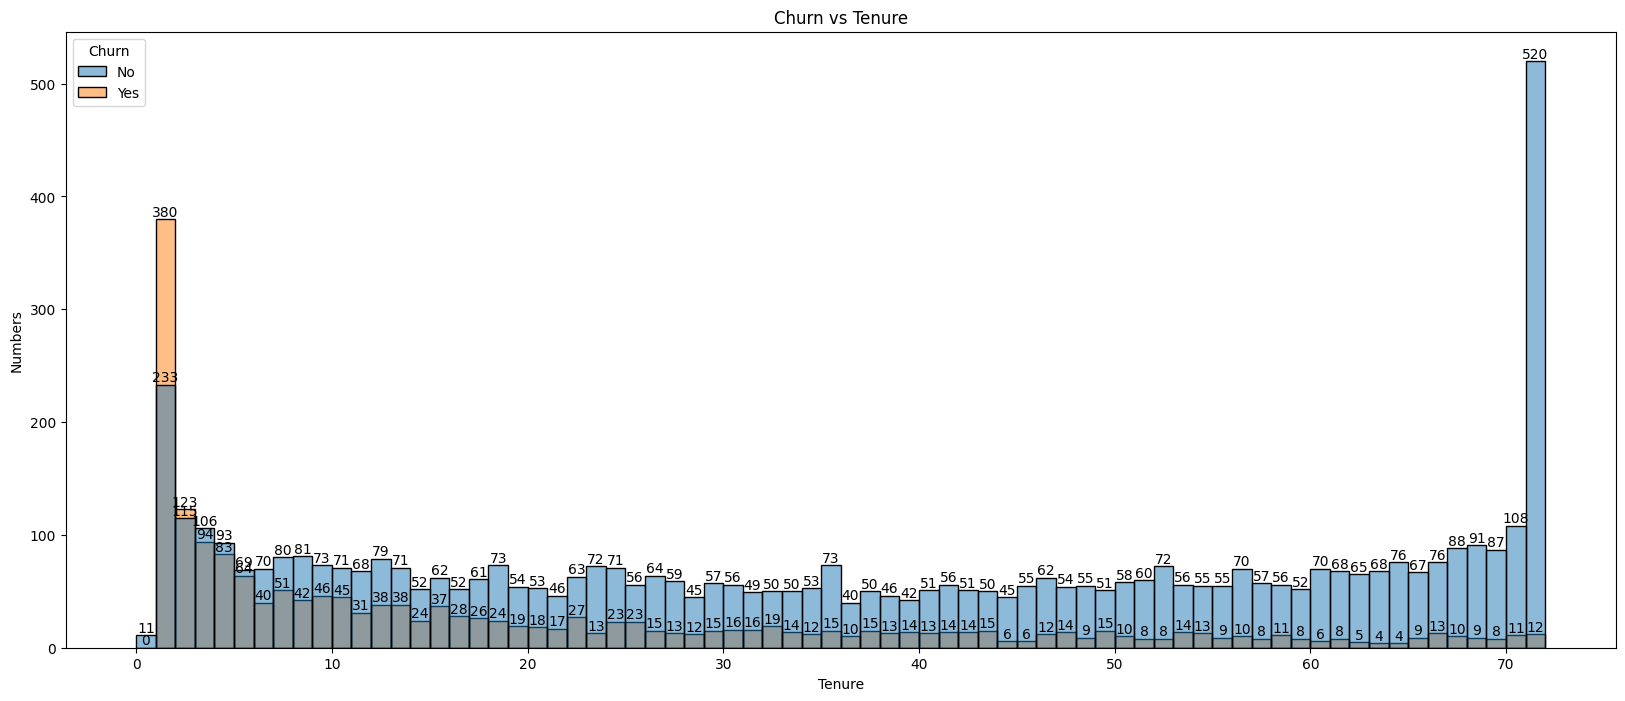

In [ ]:
plt.figure(figsize=(20, 8))

ax = sns.histplot(x='tenure', data=df, bins=72, hue='Churn')


for container in ax.containers:
  ax.bar_label(container)
plt.title("Churn vs Tenure")
plt.xlabel('Tenure')
plt.ylabel('Numbers')
plt.show()

##### Count of Customers by Contracts

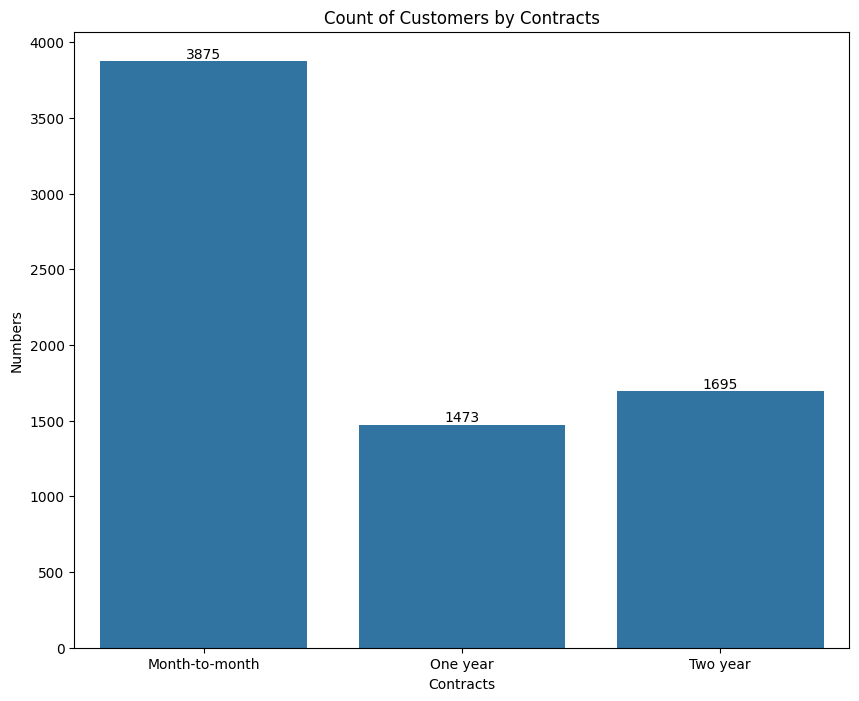

In [ ]:
plt.figure(figsize=(10, 8))

ax = sns.countplot(x='Contract', data=df)


for container in ax.containers:
  ax.bar_label(container)
plt.title("Count of Customers by Contracts")
plt.xlabel('Contracts')
plt.ylabel('Numbers')
plt.show()

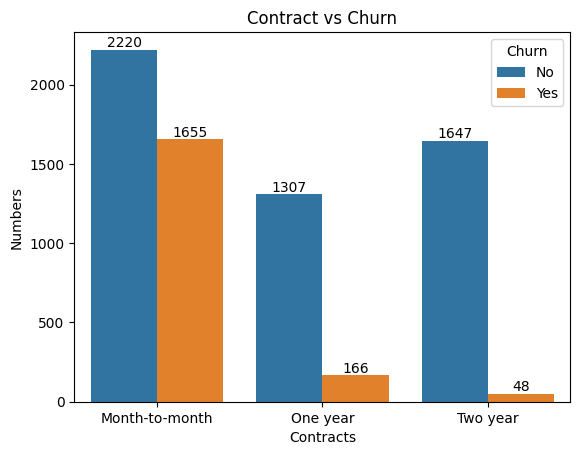

In [ ]:
ax = sns.countplot(x='Contract', data=df, hue='Churn')

for container in ax.containers:
  ax.bar_label(container)

plt.title("Contract vs Churn")
plt.xlabel('Contracts')
plt.ylabel('Numbers')
plt.show()

In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

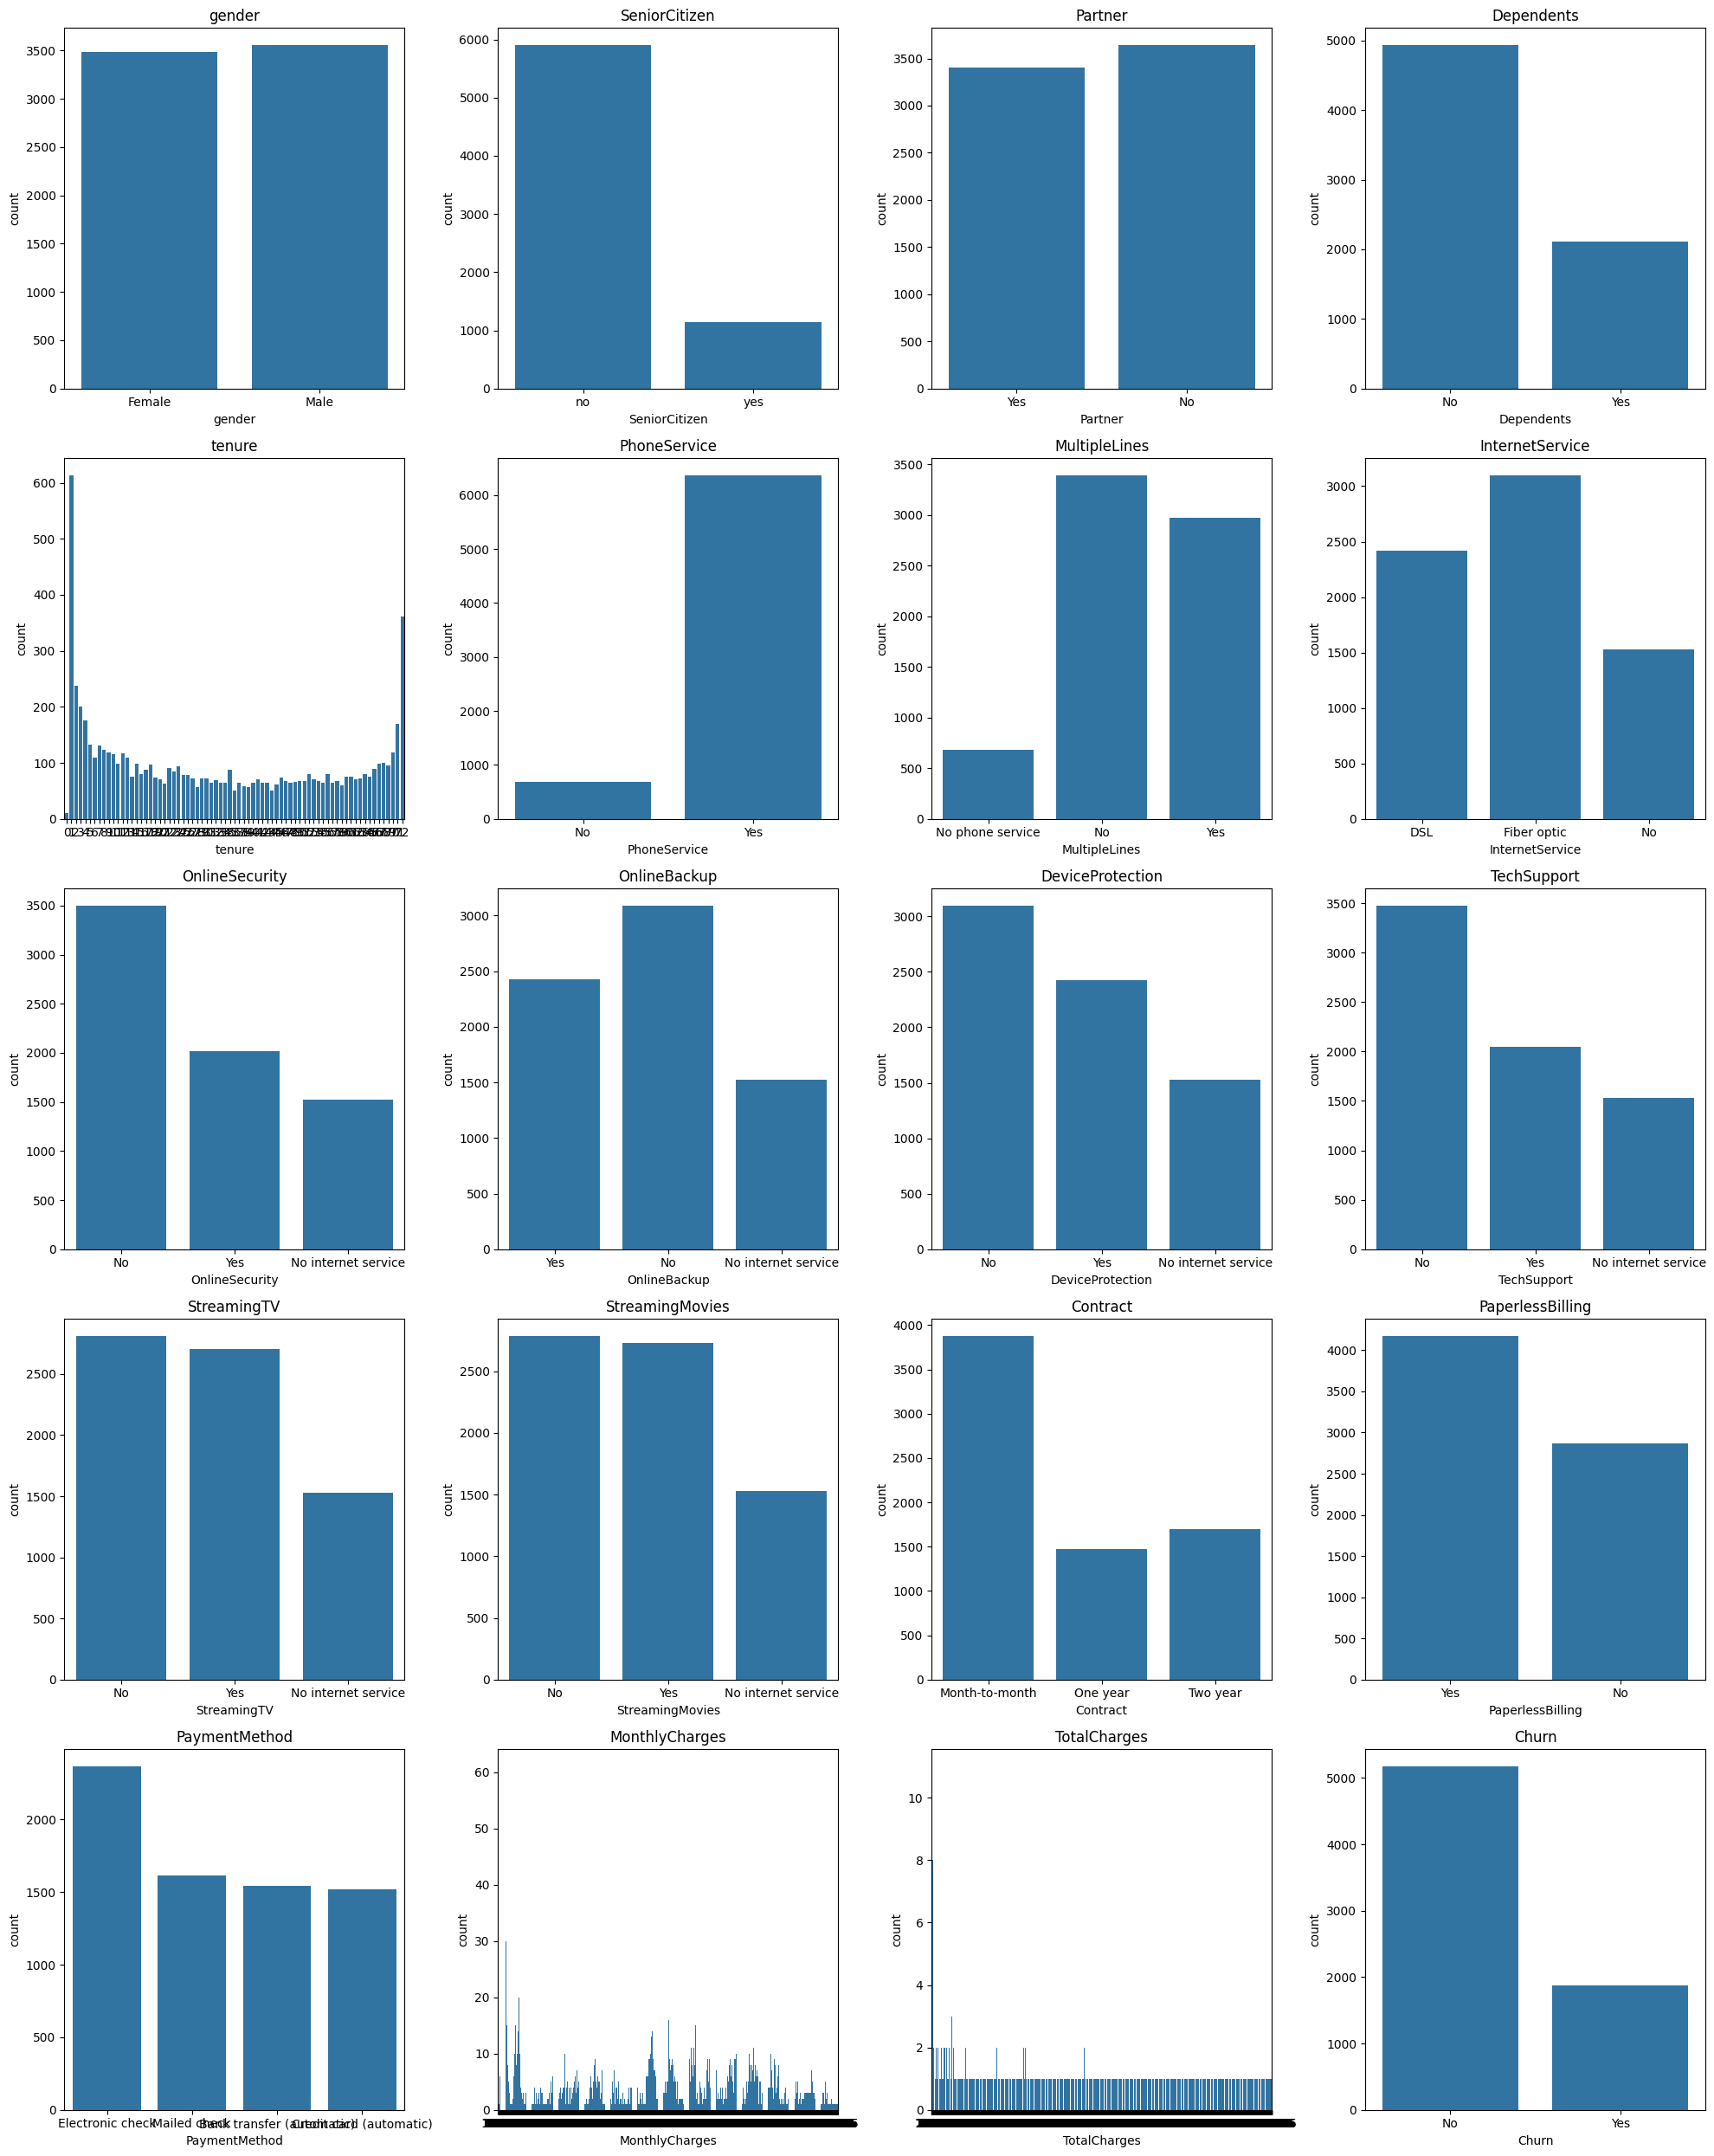

In [ ]:
cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

plt.figure(figsize=(20, 25))

for i, col in enumerate(cols, 1):
  plt.subplot(5, 4, i)  # 5 rows, 4 columns of plots
  sns.countplot(x=col, data=df)
  plt.title(col)

plt.tight_layout()
plt.show()

C:\Users\PRITHWIS\AppData\Local\Temp\ipykernel_13448\2147767072.py:18: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\PRITHWIS\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


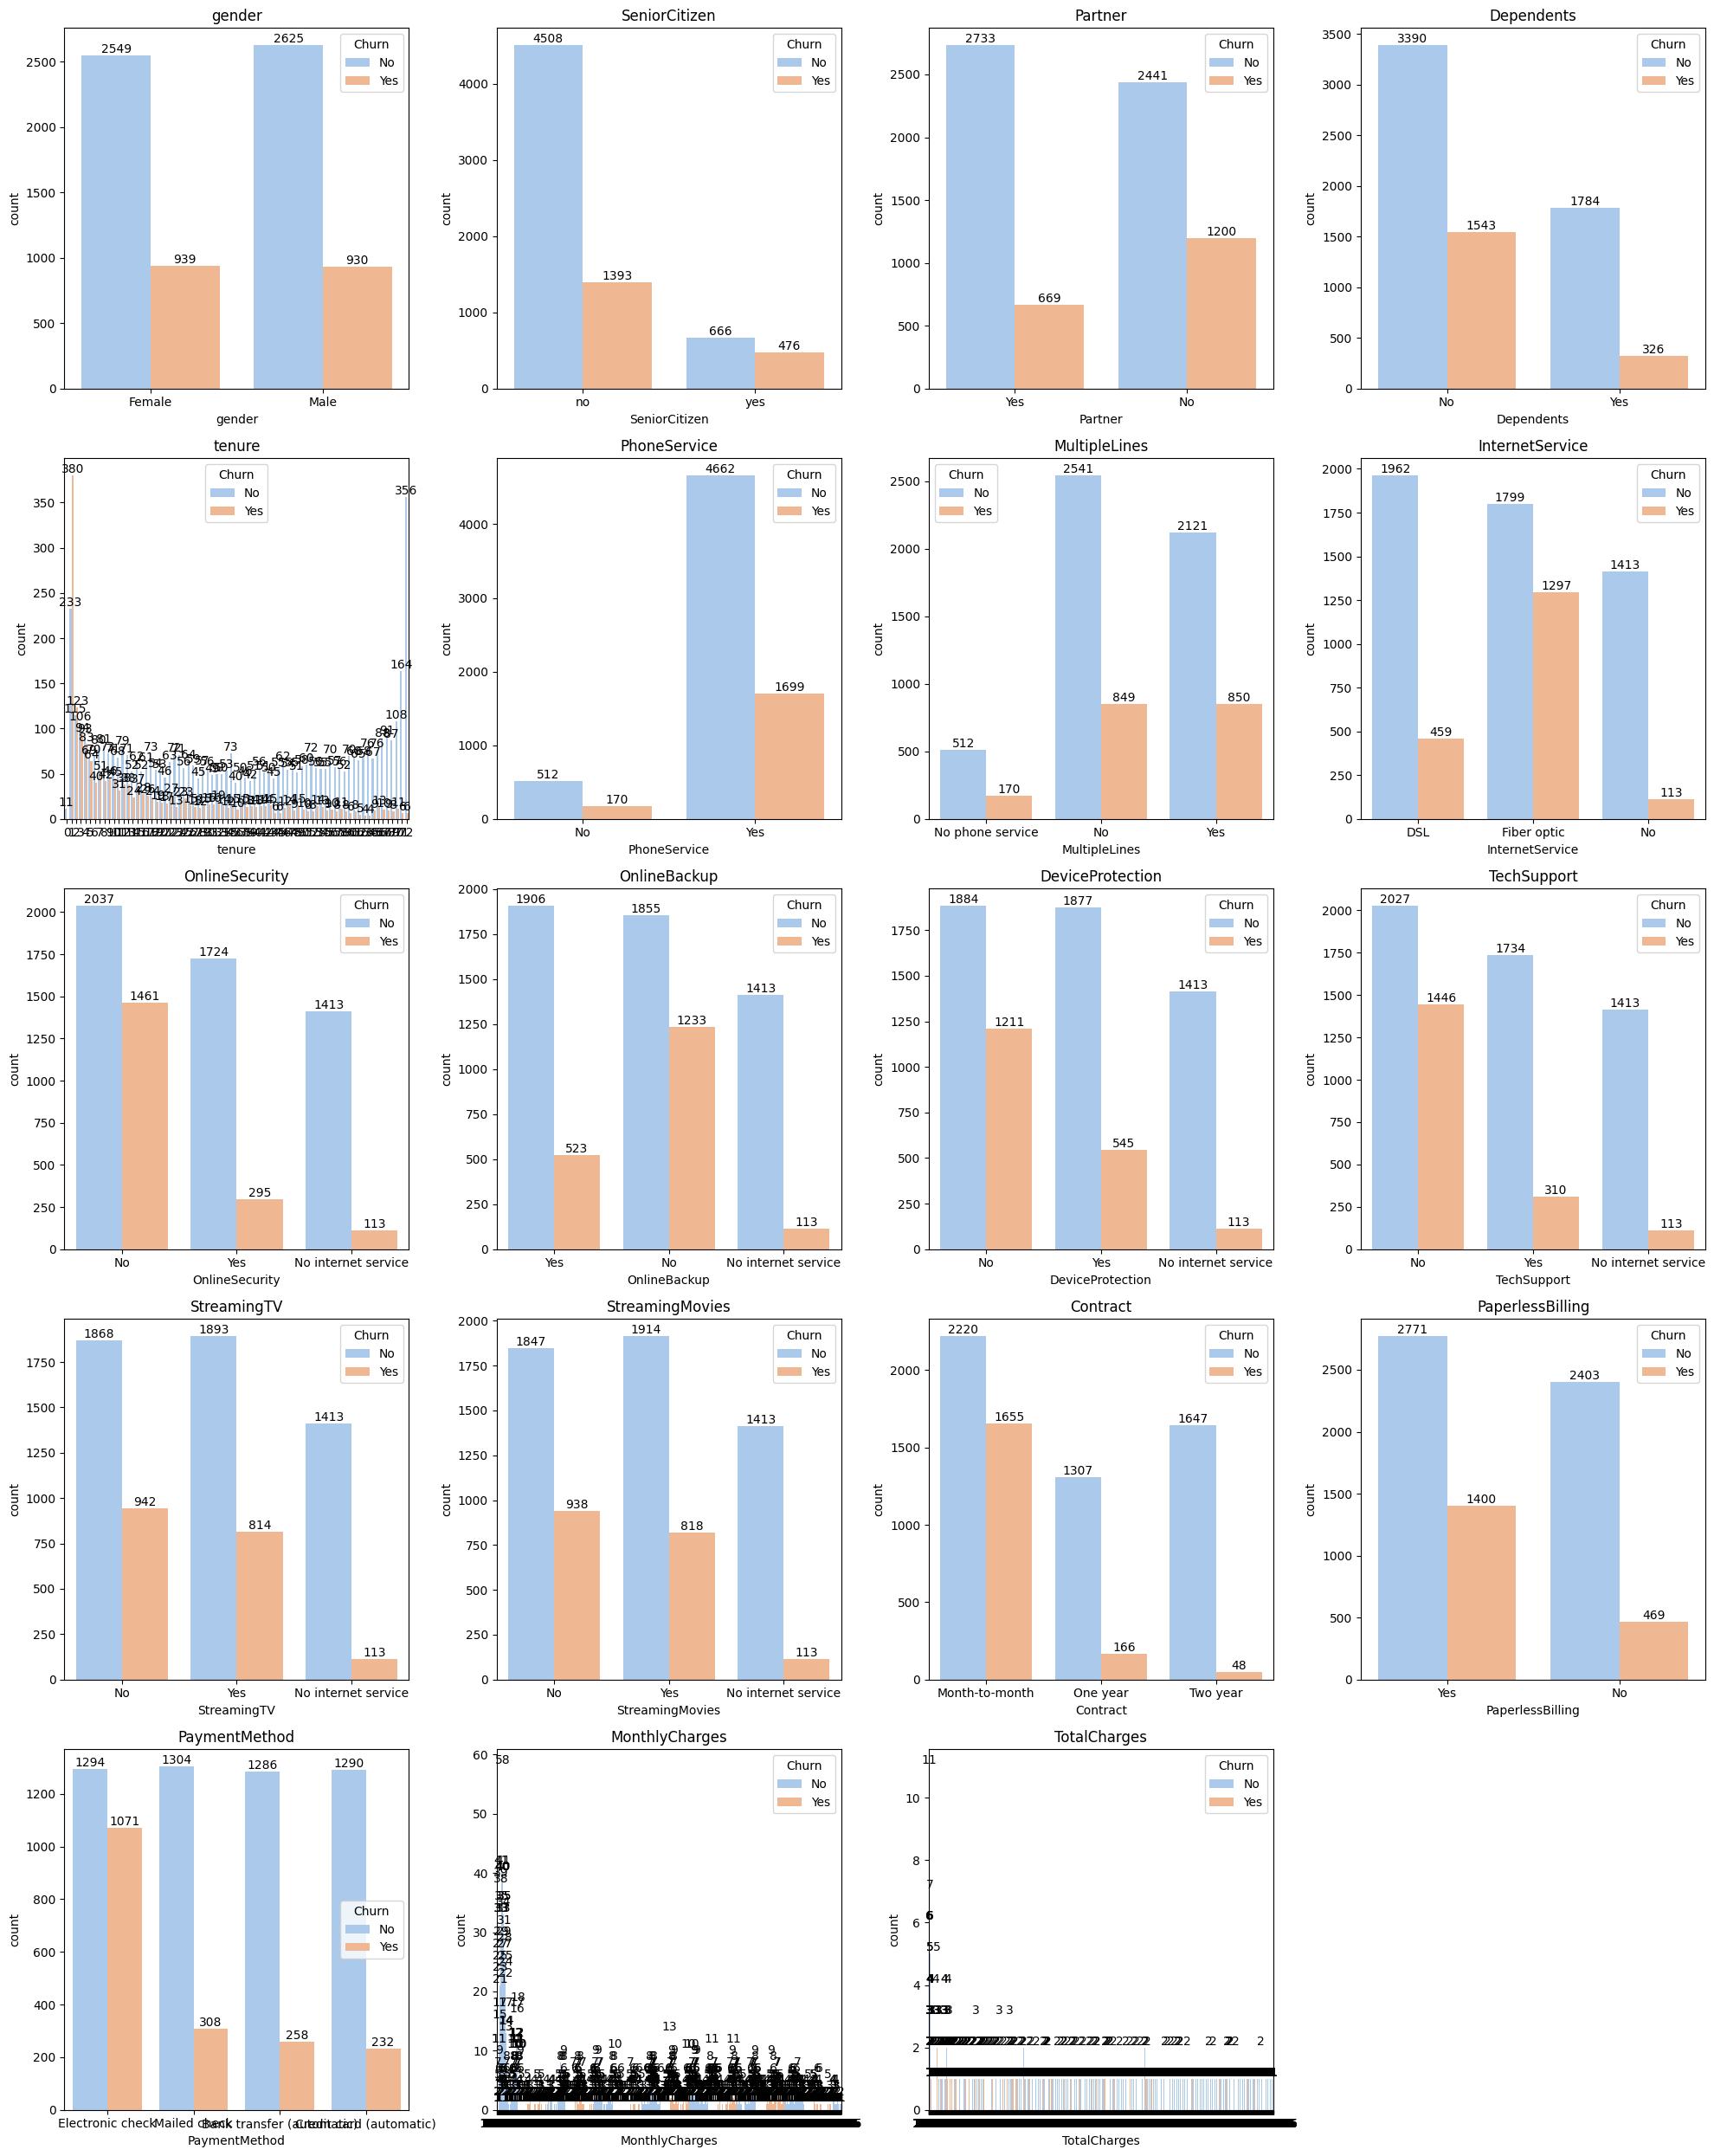

In [ ]:
cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
        'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
        'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
        'PaymentMethod', 'MonthlyCharges', 'TotalCharges']

plt.figure(figsize=(20, 25))

for i, col in enumerate(cols, 1):
    plt.subplot(5, 4, i)  # 5 rows, 4 columns of plots
    ax = sns.countplot(x=col, data=df, hue='Churn', palette='pastel')
    plt.title(col)
    
    
    for container in ax.containers: # For showing count labels in each bars
        ax.bar_label(container, fmt='%d')

plt.tight_layout()
plt.show()

**Conclusion : ->**
The telecom dataset shows that most customers did not churn, with churn being slightly higher among month-to-month contract users.

Customers with no online security, tech support, or backup services tend to leave more often.
Higher churn is also observed among those with electronic check payments and fiber optic internet.

In contrast, customers with long-term contracts and additional services are more likely to stay.

##### Churn Customers vs Payment Methods

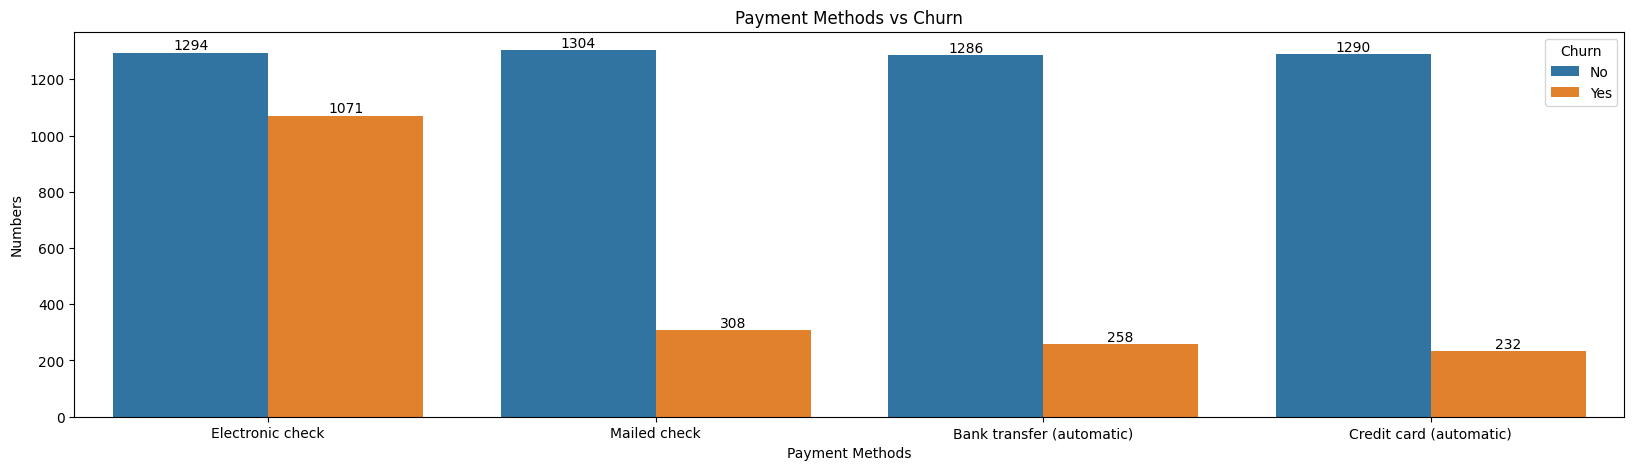

In [ ]:
plt.figure(figsize=(20, 5))

ax = sns.countplot(x='PaymentMethod', data=df, hue='Churn')

for container in ax.containers:
  ax.bar_label(container)

plt.title("Payment Methods vs Churn")
plt.xlabel('Payment Methods')
plt.ylabel('Numbers')
plt.show()

## Questions

#### **Q1) Load the dataset and display the first 5 rows.**

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### **Q2) Show the number of rows and columns in the dataset.**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Conclusion: ->**    Rows No.: 7043, Columns No.:21

#### **Q3) Display the data types of all columns.**

In [ ]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

#### **Q4) Check if there are any missing values in the dataset.**

In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**Conclusion: ->** There are no missing values in this dataset 

#### **Q5) Show the number of unique values in each categorical column.**

In [ ]:
col_categorical = df.select_dtypes(include='object').columns  # Checks Categorical Column

col_Numerical = df.select_dtypes(include='int').columns  # Checks Numerical Column

col_Float = df.select_dtypes(include='float').columns  # Checks Float Column

# print("\033[1;31mWarning: High Churn Detected!\033[0m") # Change text color to red

print("\033[1;96mCategorical Columns: ->\033[0m", col_categorical)
print()

print("\033[1;96mNumerical Columns: ->\033[0m", col_Numerical)
print()

print("\033[1;96mFloat Columns: ->\033[0m", col_Float)


Categorical Columns: -> Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')

Numerical Columns: -> Index(['SeniorCitizen', 'tenure'], dtype='object')

Float Columns: -> Index(['MonthlyCharges'], dtype='object')


In [ ]:
col_categorical = df.select_dtypes(include='object').columns
# Numbers of columns

for col in df.columns:
  print(col, df[col].nunique())

customerID 7043
gender 2
SeniorCitizen 2
Partner 2
Dependents 2
tenure 73
PhoneService 2
MultipleLines 3
InternetService 3
OnlineSecurity 3
OnlineBackup 3
DeviceProtection 3
TechSupport 3
StreamingTV 3
StreamingMovies 3
Contract 3
PaperlessBilling 2
PaymentMethod 4
MonthlyCharges 1585
TotalCharges 6531
Churn 2


#### Data Cleaning

In [ ]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', '0')
df['TotalCharges'] = df['TotalCharges'].astype('float')

In [ ]:
def convert(value):
  if value == 1:
    return 'yes'
  else:
    return 'no'
  
df['SeniorCitizen'] = df['SeniorCitizen'].apply(convert)

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### **Q6) Find the percentage of customers who have churned vs. not churned.**

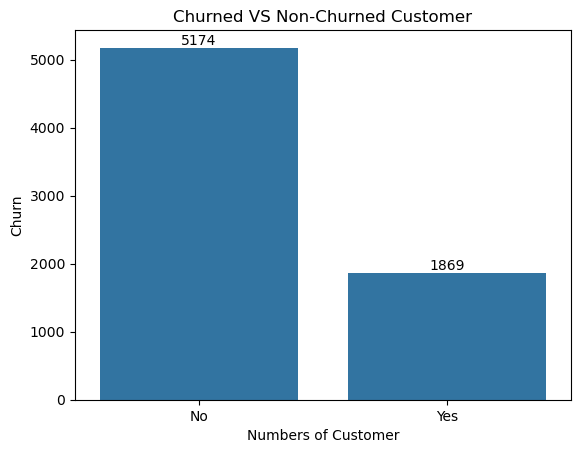

In [ ]:
ax = sns.countplot(x='Churn', data=df)

for container in ax.containers:
  ax.bar_label(container)

plt.title("Churned VS Non-Churned Customer")
plt.xlabel('Numbers of Customer')
plt.ylabel('Churn')
plt.show()

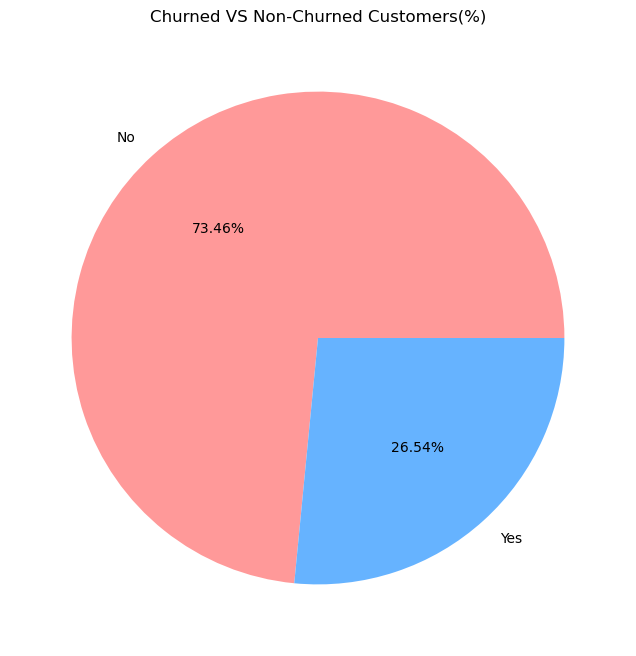

In [ ]:
plt.figure(figsize=(8, 8))

gb = df.groupby('Churn').agg({'Churn':'count'})

plt.pie(gb['Churn'], labels=gb.index, autopct="%1.2f%%", colors = ['#ff9999', '#66b3ff'])

plt.title("Churned VS Non-Churned Customers(%)")
plt.show()

#### **Q7) Plot a bar chart showing churn count for each gender.**

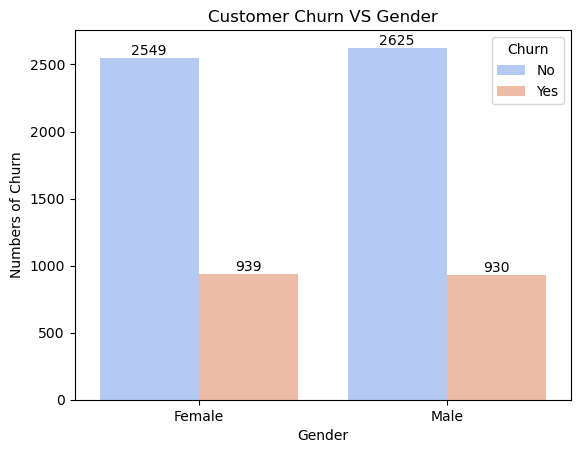

In [ ]:
ax = sns.countplot(x='gender', data=df, hue='Churn', palette='coolwarm')

for container in ax.containers:
  ax.bar_label(container)

plt.title('Customer Churn VS Gender')
plt.xlabel('Gender')
plt.ylabel('Numbers of Churn')

plt.show()

#### **Q8) Show the distribution of customer tenure using a histogram.**

In [ ]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


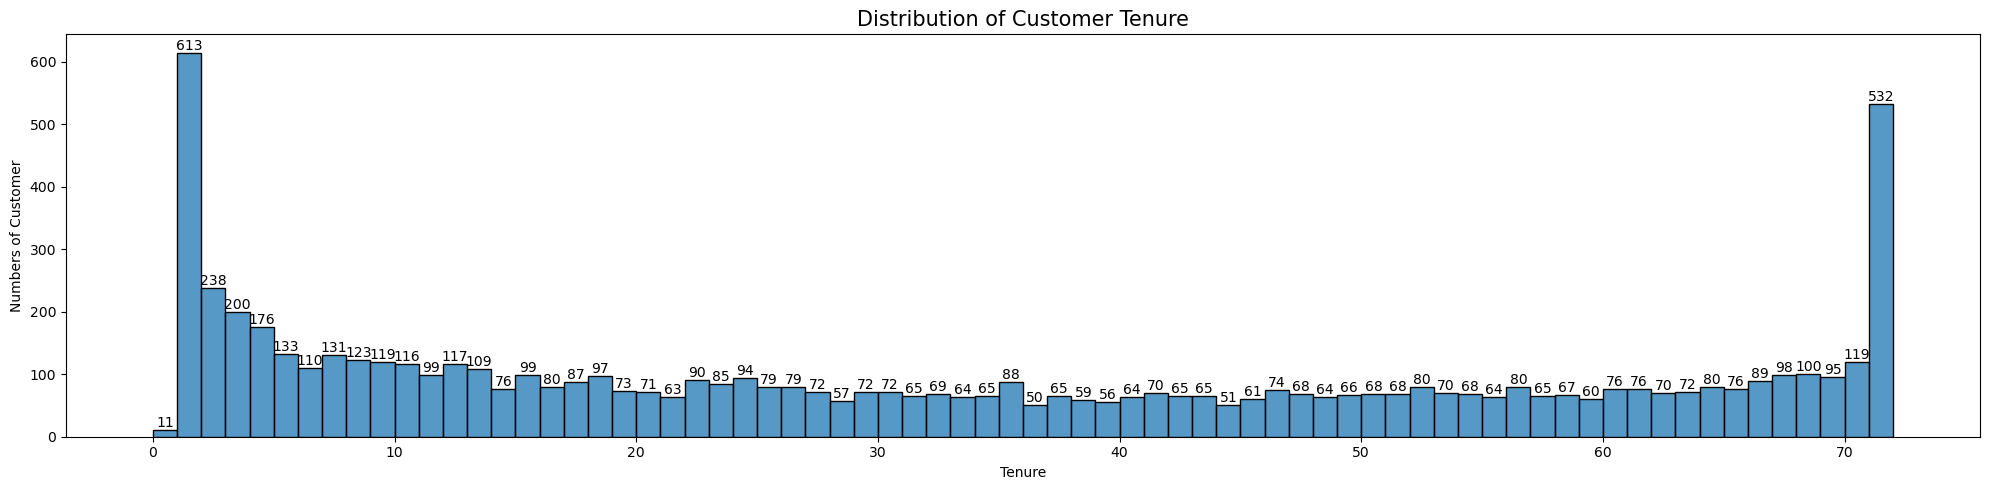

In [ ]:
plt.figure(figsize=(20,5))
ax = sns.histplot(x='tenure', data=df, bins=72)

for container in ax.containers:
  ax.bar_label(container)

plt.title('Distribution of Customer Tenure', fontsize='15')
plt.xlabel('Tenure')
plt.ylabel('Numbers of Customer')
plt.tight_layout()
plt.show()

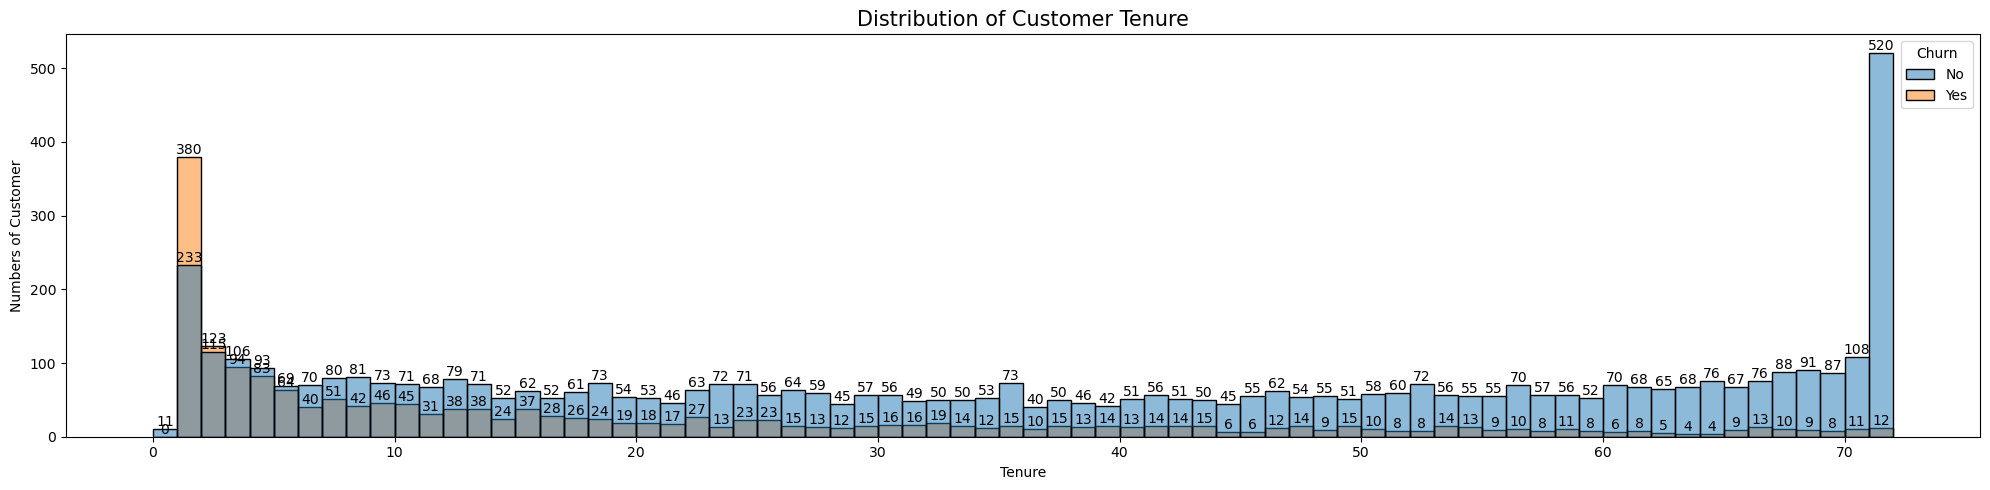

In [ ]:
plt.figure(figsize=(20,5))
ax = sns.histplot(x='tenure', data=df, bins=72, hue='Churn')

for container in ax.containers:
  ax.bar_label(container)

plt.title('Distribution of Customer Tenure', fontsize='15')
plt.xlabel('Tenure')
plt.ylabel('Numbers of Customer')
plt.tight_layout()
plt.show()

#### **Q9) Compare the average MonthlyCharges of churned vs. non-churned customers.**

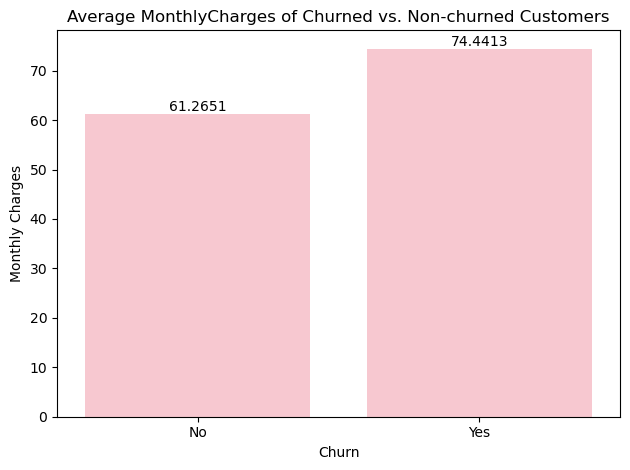

In [ ]:
avg_monthlyCharges = df.groupby('Churn')['MonthlyCharges'].mean().reset_index()

ax = sns.barplot(x='Churn', y='MonthlyCharges', data=avg_monthlyCharges, color='pink')

for container in ax.containers:
  ax.bar_label(container)

plt.title('Average MonthlyCharges of Churned vs. Non-churned Customers')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.tight_layout()
plt.show()

#### **Q10) Find which InternetService type has the highest churn rate.**

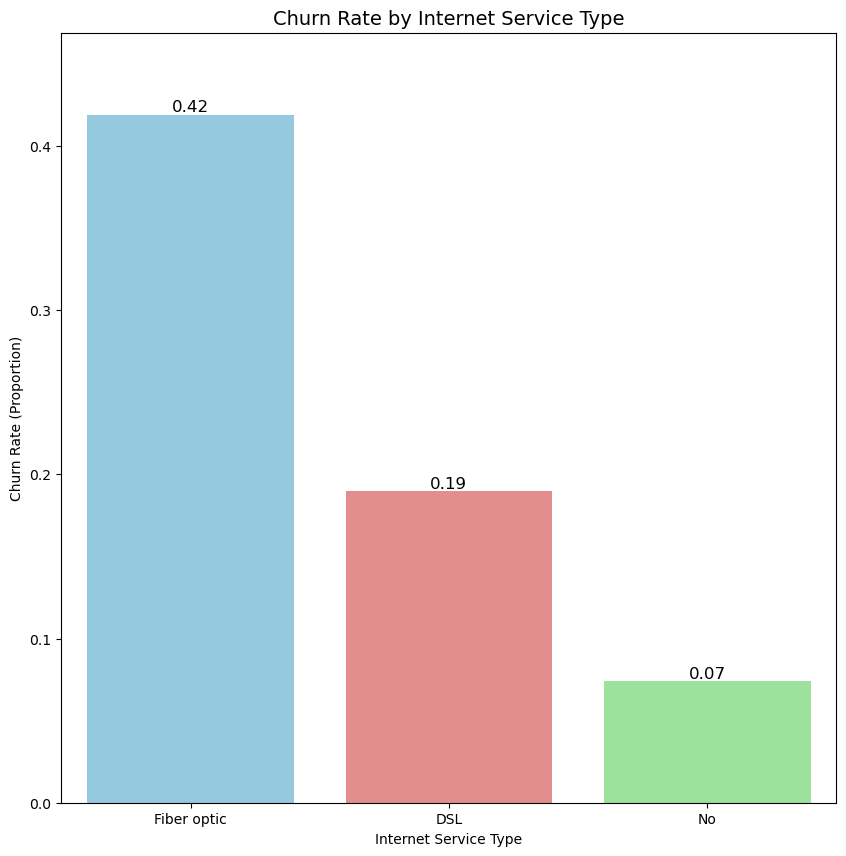

In [ ]:
churn_rate = (
    df.groupby("InternetService")["Churn"]
    .value_counts(normalize=True)  # proportion (0–1)
    .rename("ChurnRate")
    .reset_index()
)

churn_rate = churn_rate[churn_rate["Churn"] == "Yes"]

churn_rate = churn_rate.sort_values(by="ChurnRate", ascending=False)

plt.figure(figsize=(10,10))
ax = sns.barplot(
    x="InternetService",
    y="ChurnRate",
    data=churn_rate,
    hue="InternetService",                 
    palette=["skyblue", "lightcoral", "lightgreen"],
    legend=False
)

for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", fontsize=12)

plt.title("Churn Rate by Internet Service Type", fontsize=14)
plt.xlabel("Internet Service Type")
plt.ylabel("Churn Rate (Proportion)")
plt.ylim(0, churn_rate["ChurnRate"].max() + 0.05)
plt.show()

**Conclusion: ->** Fiber Optic Internet Service Type Has The Highest Churn Rate

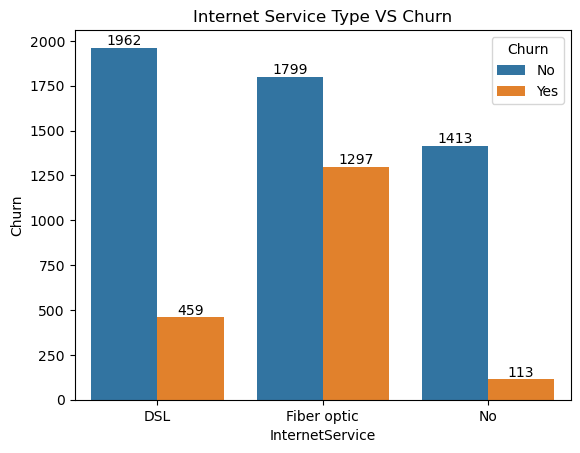

In [ ]:
ax = sns.countplot(x='InternetService', data=df, hue='Churn')

for container in ax.containers:
  ax.bar_label(container)
  
plt.title('Internet Service Type VS Churn')
plt.xlabel('InternetService')
plt.ylabel('Churn')
plt.show()

#### **Q11) Plot a boxplot comparing MonthlyCharges and Churn.**

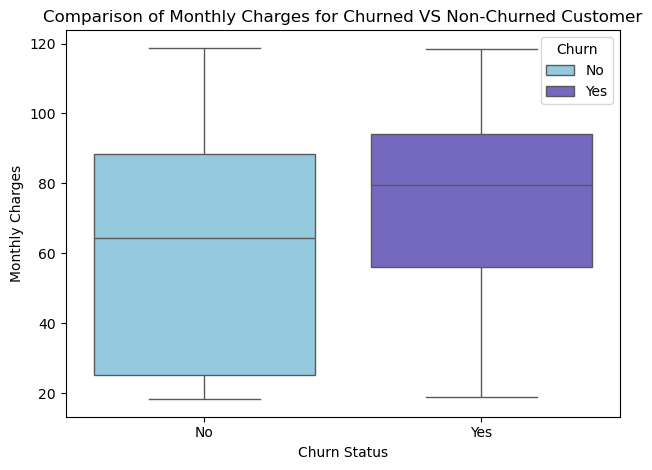

In [ ]:
ax = sns.boxplot(x='Churn', y='MonthlyCharges', hue='Churn', data=df, palette=['skyblue', 'slateblue'], legend=True)

plt.title('Comparison of Monthly Charges for Churned VS Non-Churned Customer')
plt.xlabel('Churn Status')
plt.ylabel('Monthly Charges')
plt.tight_layout()
plt.show()

#### **Q12) Show the correlation between tenure, MonthlyCharges, and TotalCharges.**

In [ ]:
# Q) Show the correlation between tenure, MonthlyCharges, and TotalCharges.

corr_data = df[['tenure', 'MonthlyCharges', 'TotalCharges']]
corr_matrix = corr_data.corr()

corr_matrix

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.247900,0.826178
MonthlyCharges,0.247900,1.000000,0.651174
TotalCharges,0.826178,0.651174,1.000000


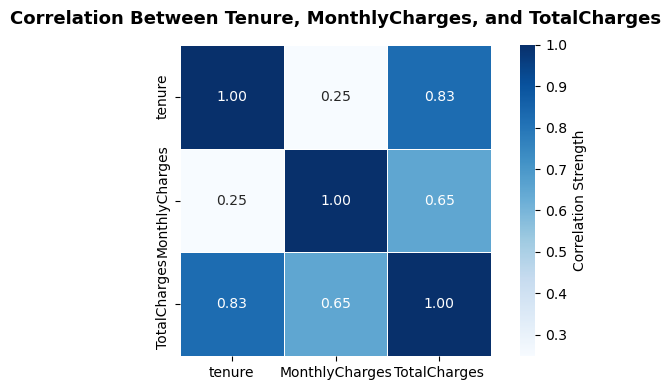

In [ ]:
corr_data = df[['tenure', 'MonthlyCharges', 'TotalCharges']]

corr_matrix = corr_data.corr()

plt.figure(figsize=(6,4))
sns.heatmap(
    corr_matrix,
    annot=True,                
    fmt=".2f",                 
    cmap="Blues",              
    linewidths=0.5,
    square=True,
    cbar_kws={'label': 'Correlation Strength'}
)

plt.title('Correlation Between Tenure, MonthlyCharges, and TotalCharges', 
        fontsize=13, fontweight='bold', pad=15)
plt.tight_layout()
plt.show()

#### **Q13) Does Contract type affect churn rate? Show with a plot.**

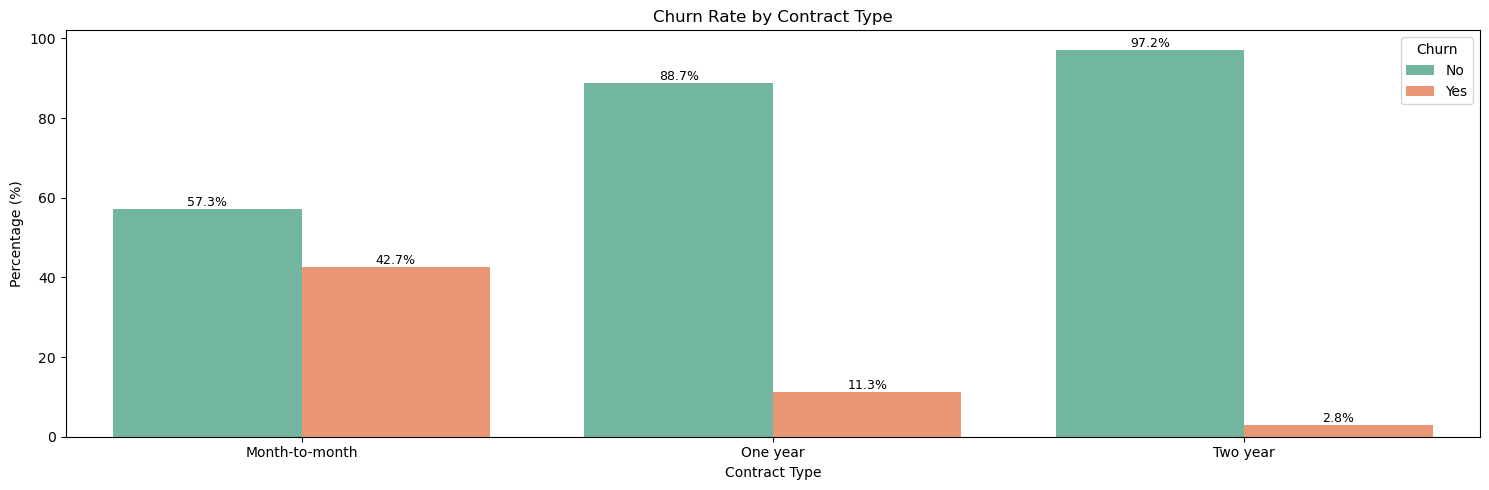

In [ ]:
contact_churn = df.groupby('Contract')['Churn'].value_counts(normalize=True).rename('Percentage').mul(100).reset_index()

plt.figure(figsize=(15, 5))

sns.barplot(x='Contract', y='Percentage', hue='Churn', data = contact_churn, palette='Set2')

for container in plt.gca().containers:
  plt.bar_label(container, fmt="%.1f%%", label_type='edge', fontsize=9)
  
plt.title('Churn Rate by Contract Type')
plt.xlabel("Contract Type")
plt.ylabel('Percentage (%)')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

**Conclusion: ->** 

Month-to-month customers show the highest churn percentage, meaning they are far more likely to leave.

One year and Two year contracts have much lower churn, showing that longer contracts increase customer retention.

#### **Q14) Check if customers with OnlineSecurity = Yes have lower churn.**

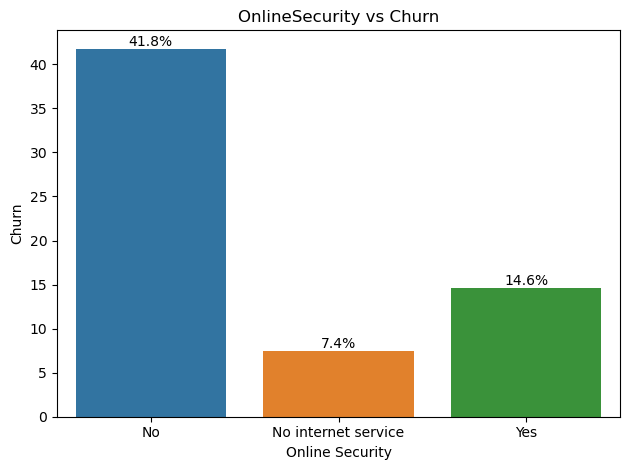

In [ ]:
Online_churn = df.groupby('OnlineSecurity')['Churn'].value_counts(normalize=True).rename('percentage').mul(100).reset_index()

Online_churn_rate = Online_churn[Online_churn['Churn']=='Yes']
ax = sns.barplot(x='OnlineSecurity', y='percentage', hue='OnlineSecurity', data = Online_churn_rate)

for container in ax.containers:
  ax.bar_label(container, fmt='%.2f%%', label_type='edge')

plt.title('OnlineSecurity vs Churn')
plt.xlabel('Online Security')
plt.ylabel('Churn')
plt.tight_layout()
plt.show()



#### **Q15) Find the top 3 services (e.g., OnlineBackup, StreamingTV, TechSupport) most associated with churn.**

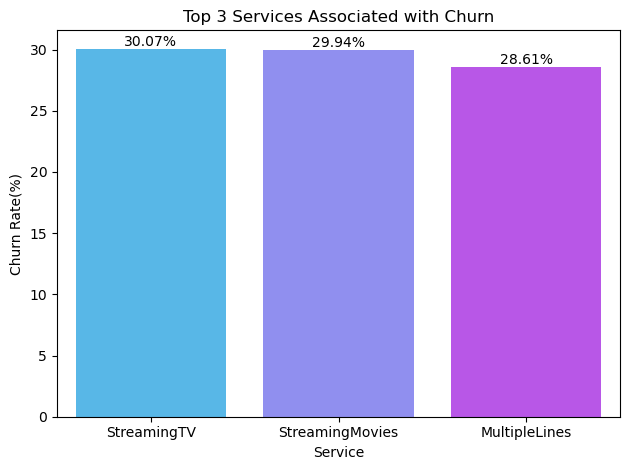

In [ ]:
All_Services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

ChurnRate = {}

for col in All_Services:
  churn_users = df[df[col] == 'Yes']
  if len(churn_users) > 0:
    churn_percent = (churn_users['Churn'].value_counts(normalize=True).get('Yes', 0) * 100)
    ChurnRate[col] = churn_percent
    
top_3 = pd.DataFrame(list(ChurnRate.items()), columns=['Service', 'ChurnRate(%)'])
top_3 = top_3.sort_values(by='ChurnRate(%)', ascending=False).head(3)

ax = sns.barplot(x='Service', y='ChurnRate(%)', hue='Service', data=top_3, legend=False, palette='cool')

for container in ax.containers:
  ax.bar_label(container, fmt='%.2f%%')

plt.title('Top 3 Services Associated with Churn')
plt.xlabel('Service')
plt.ylabel('Churn Rate(%)')
plt.tight_layout()
plt.show()

#### **Q16) Group customers by Contract and find the average tenure and MonthlyCharges.**

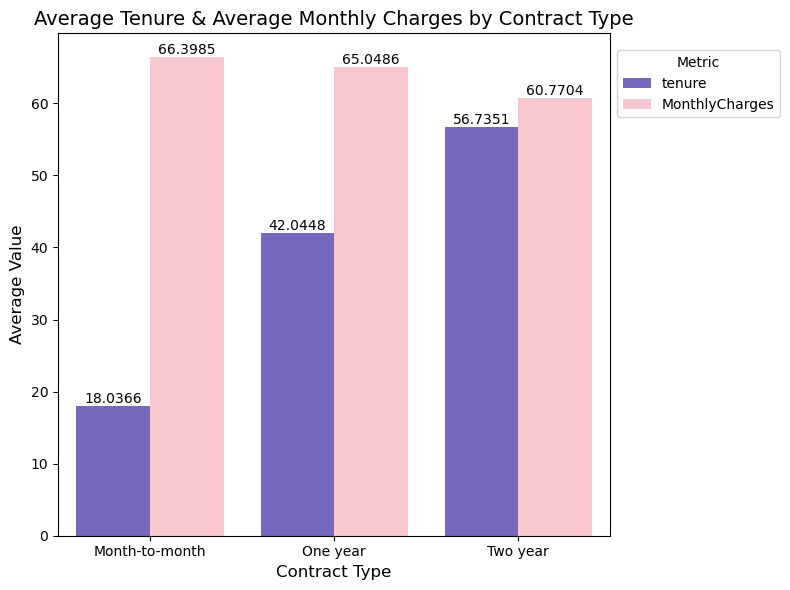

In [ ]:
contract_info = df.groupby('Contract')[['tenure', 'MonthlyCharges']].mean().reset_index()

contract_melted = contract_info.melt(
    id_vars='Contract',
    value_vars=['tenure', 'MonthlyCharges'],
    var_name='Metric',
    value_name='Average Value'
)

plt.figure(figsize=(8, 6))
ax = sns.barplot(
    x='Contract',
    y='Average Value',
    hue='Metric',
    data=contract_melted,
    palette=['slateblue', 'pink']
)

for container in ax.containers:
    ax.bar_label(container)

plt.title('Average Tenure & Average Monthly Charges by Contract Type', fontsize=14)
plt.xlabel('Contract Type', fontsize=12)
plt.ylabel('Average Value', fontsize=12)
plt.legend(title='Metric', bbox_to_anchor=(1, 0.9), loc='center left')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()


#### **Q17) Group by PaymentMethod and show the churn percentage for each.**

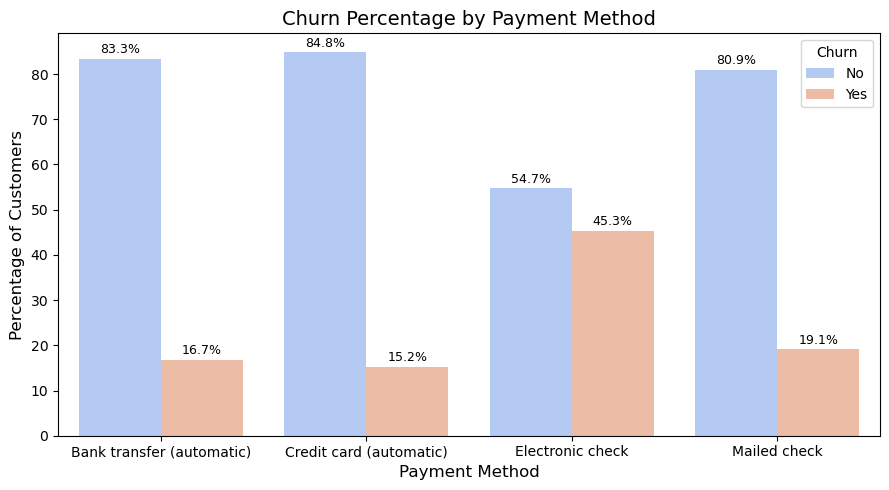

In [ ]:
PaymentMethod_Group = (
    df.groupby('PaymentMethod')['Churn']
      .value_counts(normalize=True)
      .mul(100)
      .rename('Percentage')
      .reset_index()
)

plt.figure(figsize=(9,5))
ax = sns.barplot(
    x='PaymentMethod',
    y='Percentage',
    hue='Churn',           # separate bars for Yes and No
    data=PaymentMethod_Group,
    palette='coolwarm'     # blue-red color contrast
)

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', padding=2, fontsize=9)

plt.title("Churn Percentage by Payment Method", fontsize=14)
plt.xlabel("Payment Method", fontsize=12)
plt.ylabel("Percentage of Customers", fontsize=12)
plt.tight_layout()
plt.show()

#### **Q18) Calculate the total revenue (sum of TotalCharges) from churned vs. active customers.**

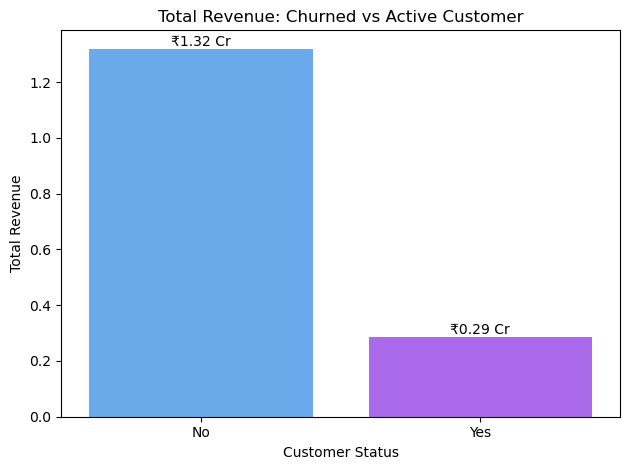

In [ ]:
total_revenue = df.groupby('Churn')['TotalCharges'].sum().reset_index()

total_revenue['TotalCharges'] = total_revenue['TotalCharges'] / 1e7

ax = sns.barplot(x='Churn', y='TotalCharges',hue='Churn', data=total_revenue, palette='cool')

for container in ax.containers:
  ax.bar_label(container, fmt='₹%.2f Cr')

plt.title('Total Revenue: Churned vs Active Customer')
plt.xlabel('Customer Status')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### **Q19) Encode categorical variables and check the shape of the new DataFrame.**

In [ ]:
df.shape

(7043, 21)

In [ ]:
df_encoded = pd.get_dummies(df, drop_first=True)

print('Shape of encoded DataFrame: ', df_encoded.shape)

Shape of encoded DataFrame:  (7043, 7073)


#### **Q20) Split the data into training and testing sets for predictive modeling (80%-20%).**

In [ ]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('Churn_Yes', axis=1)
y = df_encoded['Churn_Yes']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5634, 7072)
X_test shape: (1409, 7072)
y_train shape: (5634,)
y_test shape: (1409,)
